/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Cреднеквадратичная ошибка (MSE) тестовой выборки: 3198.9432


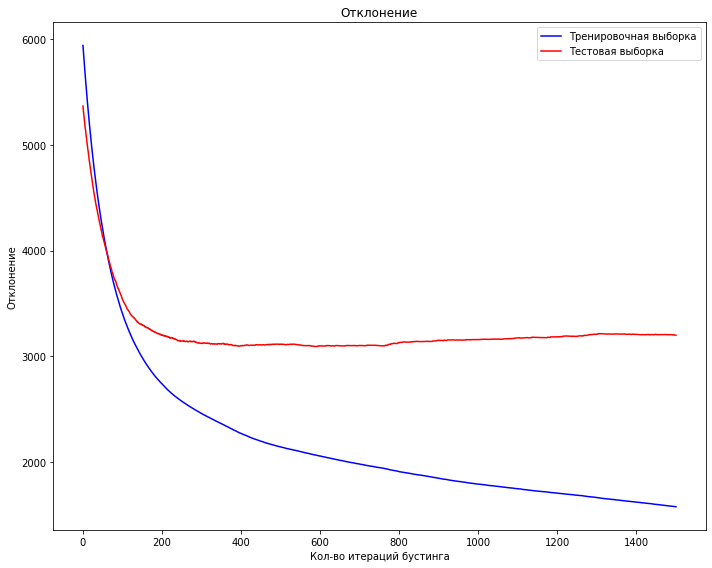

In [1]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#---------Настройки---------
n_trees = 1500 #Кол-во деревьев
max_depth = 2 #Максимальная глубина, ограничивает количество узлов в дереве
min_samples_split = 5 #Минимальное количество выборок, необходимых для разделения внутреннего узла
learning_rate = 0.01 #Cкорость обучения, уменьшает вклад каждого дерева на величину learning_rate
loss = 'ls' #Функция потерь для оптимизации. В этом случае используется функция наименьших квадратов

diabetes = datasets.load_diabetes() #Датасет данных по диабету
X, y = diabetes.data, diabetes.target
#Разделим наш набор данных, чтобы использовать 90% для обучения, а остальное оставим для тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13) 
#Параметры для градиентного бустинга
params = {'n_estimators': n_trees, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'learning_rate': learning_rate, 'loss': loss}

reg = ensemble.GradientBoostingRegressor(**params) #Регрессионная модель
reg.fit(X_train, y_train) #Подгонка к нашим обучающим данным
mse = mean_squared_error(y_test, reg.predict(X_test)) #Расчёт среднеквадратичной ошибки тестовой выборки
print("Cреднеквадратичная ошибка (MSE) тестовой выборки: {:.4f}".format(mse))

test_score = np.zeros((params['n_estimators'],), dtype=np.float64) #Возвращает новый массив указанной формы и типа, заполненный нулями
for i, y_pred in enumerate(reg.staged_predict(X_test)):  #Вычислим отклонение тестовой выборки для количества деревьев от 0 до n_trees
    test_score[i] = reg.loss_(y_test, y_pred) #Вычисляем потери

fig = plt.figure(figsize=(10, 8))
plt.subplot(1, 1, 1)
plt.title('Отклонение')
plt.xlabel('Кол-во итераций бустинга')
plt.ylabel('Отклонение')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-', label = 'Тренировочная выборка')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label = 'Тестовая выборка')
plt.legend(loc = 'upper right') 
fig.tight_layout()
plt.show()